In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

pd.set_option('display.max_columns', 200)

In [2]:
train = pd.read_csv('../data/training_v2.csv')
test = pd.read_csv('../data/unlabeled.csv')

In [3]:
test_columns = test.columns
train.shape,test.shape

((91713, 186), (39308, 186))

In [4]:
# Need to remove the hospital_death column from test
test.head(3)

,encounter_id,patient_id,hospital_id,hospital_death,age,bmi,elective_surgery,ethnicity,gender,height,hospital_admit_source,icu_admit_source,icu_id,icu_stay_type,icu_type,pre_icu_los_days,readmission_status,weight,albumin_apache,apache_2_diagnosis,apache_3j_diagnosis,apache_post_operative,arf_apache,bilirubin_apache,bun_apache,creatinine_apache,fio2_apache,gcs_eyes_apache,gcs_motor_apache,gcs_unable_apache,gcs_verbal_apache,glucose_apache,heart_rate_apache,hematocrit_apache,intubated_apache,map_apache,paco2_apache,paco2_for_ph_apache,pao2_apache,ph_apache,resprate_apache,sodium_apache,temp_apache,urineoutput_apache,ventilated_apache,wbc_apache,d1_diasbp_invasive_max,d1_diasbp_invasive_min,d1_diasbp_max,d1_diasbp_min,d1_diasbp_noninvasive_max,d1_diasbp_noninvasive_min,d1_heartrate_max,d1_heartrate_min,d1_mbp_invasive_max,d1_mbp_invasive_min,d1_mbp_max,d1_mbp_min,d1_mbp_noninvasive_max,d1_mbp_noninvasive_min,d1_resprate_max,d1_resprate_min,d1_spo2_max,d1_spo2_min,d1_sysbp_invasive_max,d1_sysbp_invasive_min,d1_sysbp_max,d1_sysbp_min,d1_sysbp_noninvasive_max,d1_sysbp_noninvasive_min,d1_temp_max,d1_temp_min,h1_diasbp_invasive_max,h1_diasbp_invasive_min,h1_diasbp_max,h1_diasbp_min,h1_diasbp_noninvasive_max,h1_diasbp_noninvasive_min,h1_heartrate_max,h1_heartrate_min,h1_mbp_invasive_max,h1_mbp_invasive_min,h1_mbp_max,h1_mbp_min,h1_mbp_noninvasive_max,h1_mbp_noninvasive_min,h1_resprate_max,h1_resprate_min,h1_spo2_max,h1_spo2_min,h1_sysbp_invasive_max,h1_sysbp_invasive_min,h1_sysbp_max,h1_sysbp_min,h1_sysbp_noninvasive_max,h1_sysbp_noninvasive_min,h1_temp_max,h1_temp_min,d1_albumin_max,d1_albumin_min,d1_bilirubin_max,d1_bilirubin_min,d1_bun_max,d1_bun_min,d1_calcium_max,d1_calcium_min,d1_creatinine_max,d1_creatinine_min,d1_glucose_max,d1_glucose_min,d1_hco3_max,d1_hco3_min,d1_hemaglobin_max,d1_hemaglobin_min,d1_hematocrit_max,d1_hematocrit_min,d1_inr_max,d1_inr_min,d1_lactate_max,d1_lactate_min,d1_platelets_max,d1_platelets_min,d1_potassium_max,d1_potassium_min,d1_sodium_max,d1_sodium_min,d1_wbc_max,d1_wbc_min,h1_albumin_max,h1_albumin_min,h1_bilirubin_max,h1_bilirubin_min,h1_bun_max,h1_bun_min,h1_calcium_max,h1_calcium_min,h1_creatinine_max,h1_creatinine_min,h1_glucose_max,h1_glucose_min,h1_hco3_max,h1_hco3_min,h1_hemaglobin_max,h1_hemaglobin_min,h1_hematocrit_max,h1_hematocrit_min,h1_inr_max,h1_inr_min,h1_lactate_max,h1_lactate_min,h1_platelets_max,h1_platelets_min,h1_potassium_max,h1_potassium_min,h1_sodium_max,h1_sodium_min,h1_wbc_max,h1_wbc_min,d1_arterial_pco2_max,d1_arterial_pco2_min,d1_arterial_ph_max,d1_arterial_ph_min,d1_arterial_po2_max,d1_arterial_po2_min,d1_pao2fio2ratio_max,d1_pao2fio2ratio_min,h1_arterial_pco2_max,h1_arterial_pco2_min,h1_arterial_ph_max,h1_arterial_ph_min,h1_arterial_po2_max,h1_arterial_po2_min,h1_pao2fio2ratio_max,h1_pao2fio2ratio_min,apache_4a_hospital_death_prob,apache_4a_icu_death_prob,aids,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,apache_3j_bodysystem,apache_2_bodysystem
0,2,127112,7,NaN,56.0,21.102439,0,Caucasian,M,180.3,Emergency Department,Accident & Emergency,1105,admit,Neuro ICU,0.104167,0,68.6,3.7,301.0,405.01,0,0.0,NaN,19.0,0.67,NaN,2.0,5.0,0.0,1.0,276.0,105.0,42.0,0.0,57.0,NaN,NaN,NaN,NaN,5.0,134.0,36.6,1121.1264,0.0,4.7,NaN,NaN,74.0,51.0,74.0,51.0,100.0,78.0,NaN,NaN,86.0,60.0,86.0,60.0,20.0,8.0,100.0,96.0,NaN,NaN,121.0,79.0,121.0,79.0,37.1,36.6,NaN,NaN,55.0,51.0,55.0,51.0,88.0,84.0,NaN,NaN,68.0,60.0,68.0,60.0,18.0,8.0,100.0,98.0,NaN,NaN,91.0,79.0,91.0,79.0,36.6,36.6,3.7,3.7,NaN,NaN,19.0,19.0,9.3,9.3,0.67,0.67,276.0,167.0,24.0,24.0,13.8,13.8,42.0,42.0,NaN,NaN,NaN,NaN,223.0,223.0,4.8,4.8,135.0,134.0,4.7,4.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.13,0.08,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Neurological,Neurologic
1,5,130737,178,NaN,NaN,19.500595,1,Caucasian,F,145.0,Operating Room,Operating 

In [5]:
# Check if two dataset have identical columns
print(set(train.columns)-set(test.columns))
print(set(test.columns)-set(train.columns))

set()
set()


In [6]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39308 entries, 0 to 39307
Columns: 186 entries, encounter_id to apache_2_bodysystem
dtypes: float64(171), int64(7), object(8)
memory usage: 55.8+ MB


In [24]:
test.hospital_id.nunique()

66

In [25]:
test.icu_id.nunique()

99

In [7]:
# Categorical columns
categorical_cols = [col for col in test.columns if test[col].dtype=='object']

#categorical_cols = [col for col in test.columns if  (test[col].dtype != 'float64') & (test[col].dtype != 'int64') ]
print(len(categorical_cols))
for col in categorical_cols:
    print("Unique element in train for col", col, set(train[col].unique()).difference(set(test[col].unique())))
    print("Unique element in test for col", col, set(test[col].unique()).difference(set(train[col].unique())))

8
Unique element in train for col ethnicity set()
Unique element in test for col ethnicity set()
Unique element in train for col gender set()
Unique element in test for col gender set()
Unique element in train for col hospital_admit_source {'Observation'}
Unique element in test for col hospital_admit_source set()
Unique element in train for col icu_admit_source set()
Unique element in test for col icu_admit_source set()
Unique element in train for col icu_stay_type set()
Unique element in test for col icu_stay_type set()
Unique element in train for col icu_type set()
Unique element in test for col icu_type set()
Unique element in train for col apache_3j_bodysystem set()
Unique element in test for col apache_3j_bodysystem set()
Unique element in train for col apache_2_bodysystem set()
Unique element in test for col apache_2_bodysystem set()


In [8]:
# float columns
float_cols = [col for col in test.columns if  test[col].dtype == 'float64' ]
print(len(float_cols))
float_cols

171


['hospital_death',
 'age',
 'bmi',
 'height',
 'pre_icu_los_days',
 'weight',
 'albumin_apache',
 'apache_2_diagnosis',
 'apache_3j_diagnosis',
 'arf_apache',
 'bilirubin_apache',
 'bun_apache',
 'creatinine_apache',
 'fio2_apache',
 'gcs_eyes_apache',
 'gcs_motor_apache',
 'gcs_unable_apache',
 'gcs_verbal_apache',
 'glucose_apache',
 'heart_rate_apache',
 'hematocrit_apache',
 'intubated_apache',
 'map_apache',
 'paco2_apache',
 'paco2_for_ph_apache',
 'pao2_apache',
 'ph_apache',
 'resprate_apache',
 'sodium_apache',
 'temp_apache',
 'urineoutput_apache',
 'ventilated_apache',
 'wbc_apache',
 'd1_diasbp_invasive_max',
 'd1_diasbp_invasive_min',
 'd1_diasbp_max',
 'd1_diasbp_min',
 'd1_diasbp_noninvasive_max',
 'd1_diasbp_noninvasive_min',
 'd1_heartrate_max',
 'd1_heartrate_min',
 'd1_mbp_invasive_max',
 'd1_mbp_invasive_min',
 'd1_mbp_max',
 'd1_mbp_min',
 'd1_mbp_noninvasive_max',
 'd1_mbp_noninvasive_min',
 'd1_resprate_max',
 'd1_resprate_min',
 'd1_spo2_max',
 'd1_spo2_min',
 '

In [9]:
# hospital_death variable is float?  Does it mean that it holds data?
test.hospital_death.dtype

dtype('float64')

In [10]:
test.hospital_death.value_counts()

Series([], Name: hospital_death, dtype: int64)

In [11]:
test.hospital_death.max()

nan

hospital_death columns is void in test data, as what it supposed to be. Can safely ignore its datatype

In [12]:
# Look for constant columns
[col for col in train.columns if train[col].nunique() == 1]

['readmission_status']

In [13]:
# Columns that are fully populated
print("Fully populated cols in train: ", 
      [col for col in train.columns if train[col].isnull().sum()==0])
print()
print("Fully populated cols in test: ", 
      [col for col in test.columns if test[col].isnull().sum()==0])

Fully populated cols in train:  ['encounter_id', 'patient_id', 'hospital_id', 'hospital_death', 'elective_surgery', 'icu_id', 'icu_stay_type', 'icu_type', 'pre_icu_los_days', 'readmission_status', 'apache_post_operative']

Fully populated cols in test:  ['encounter_id', 'patient_id', 'hospital_id', 'elective_surgery', 'icu_id', 'icu_stay_type', 'icu_type', 'pre_icu_los_days', 'readmission_status', 'apache_post_operative']


### Data Cleaning
**29/02/2020: Answers to some of the data questions:**
* [Negative pre_icu_los_days](https://www.kaggle.com/c/widsdatathon2020/discussion/127764#729694) - from the data stewards: the values for preiculos_days are calculated using administrative data, so sometimes there are negative numbers (that's another way you can appreciate that this data is real!). "It doesn't mean anything special other than it is probably incorrect."
* [Value of -1 in `apache_4a_hospital_death_prob` AND `apache_4a_icu_death_prob`](https://www.kaggle.com/c/widsdatathon2020/discussion/127698) - -1 means the score couldn't be calculated for some reason.  In this particular dataset, it's more likely that these patient encounters have a variable missing from the APACHE-IVa equation

#### 1. Invalid Negative `pre_icu_los_days`  - <font color = 'blue'> IMPUTING </font> to -1

In [14]:
#test[test.pre_icu_los_days<0]['pre_icu_los_days'].sort_values(ascending=True)

Number of negative LOS data:  (177, 186)
Largest negative value:  -82.02847222


Text(0.5, 1.0, 'Distribution of pre_icu_los_days')

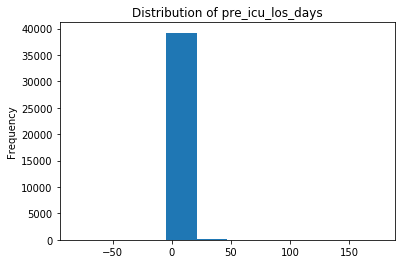

In [15]:
print("Number of negative LOS data: ",test[test.pre_icu_los_days<0].shape)
print("Largest negative value: ",test.pre_icu_los_days.min())
test.pre_icu_los_days.plot.hist()
plt.title("Distribution of pre_icu_los_days")

In [16]:
test.loc[test.pre_icu_los_days<0,'pre_icu_los_days'] = -1
test.loc[test.pre_icu_los_days<0,'pre_icu_los_days'].value_counts()

-1.0    177
Name: pre_icu_los_days, dtype: int64

#### 2. Negative `apache_4a_hospital_death_prob` & `apache_4a_icu_death_prob` 

In [17]:
print("Number of negative prob: ", test[test.apache_4a_hospital_death_prob<0]['apache_4a_hospital_death_prob'].value_counts())
print("Number of prob of 0: ", test[test.apache_4a_hospital_death_prob==0]['apache_4a_hospital_death_prob'].value_counts())
print("Number of prob of 1: ", test[test.apache_4a_hospital_death_prob==1]['apache_4a_hospital_death_prob'].value_counts())
print("Number of negative prob: ", test[test.apache_4a_icu_death_prob<0]['apache_4a_icu_death_prob'].value_counts())
print("Number of prob of 0: ", test[test.apache_4a_icu_death_prob==0]['apache_4a_icu_death_prob'].value_counts())
print("Number of prob of 1: ", test[test.apache_4a_icu_death_prob==1]['apache_4a_icu_death_prob'].value_counts())

# 1054 rows, the negative values are all -1,explanation suggests that they can't be calculated due to missing APACHE values
# Can be treated as proxy of NaN.  Keep it.
# Will also convert the rest of the NaN rows to -1 too

Number of negative prob:  -1.0    1054
Name: apache_4a_hospital_death_prob, dtype: int64
Number of prob of 0:  0.0    942
Name: apache_4a_hospital_death_prob, dtype: int64
Number of prob of 1:  Series([], Name: apache_4a_hospital_death_prob, dtype: int64)
Number of negative prob:  -1.0    1129
Name: apache_4a_icu_death_prob, dtype: int64
Number of prob of 0:  0.0    4018
Name: apache_4a_icu_death_prob, dtype: int64
Number of prob of 1:  Series([], Name: apache_4a_icu_death_prob, dtype: int64)


#### 3. <font color = 'blue'> IMPUTING </font> missing `apache_4a_hospital_death_prob` & `apache_4a_icu_death_prob` rows

Assign NaN to -1

In [18]:
print(test[['apache_4a_hospital_death_prob','apache_4a_icu_death_prob']].isnull().sum())

apache_4a_hospital_death_prob    5178
apache_4a_icu_death_prob         5178
dtype: int64


In [19]:
test['apache_4a_hospital_death_prob'] = test['apache_4a_hospital_death_prob'].fillna(-1)
test['apache_4a_icu_death_prob'] = test['apache_4a_icu_death_prob'].fillna(-1)

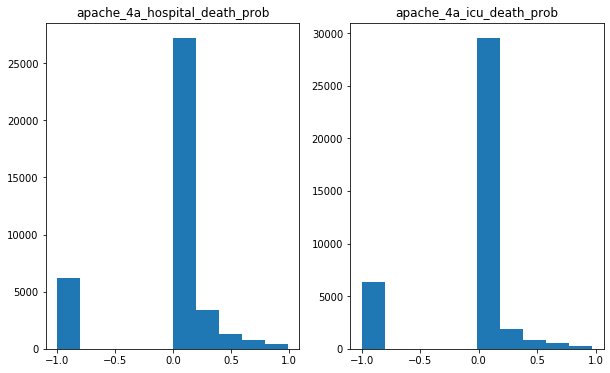

In [20]:
# After Imputation
fig,ax = plt.subplots(1,2, figsize=(10,6))
ax[0].hist(test.apache_4a_hospital_death_prob)
ax[0].title.set_text("apache_4a_hospital_death_prob")
ax[1].hist(test.apache_4a_icu_death_prob)
ax[1].title.set_text("apache_4a_icu_death_prob")

#### 4. Invalid `apache_3j_diagnosis` 

The clean-up is based on [APACH-3j ICU codebook](https://www.kaggle.com/danofer/apache-iiij-icu-diagnosis-codes)

<font color = 'blue'> IMPUTING </font>Invalid diagnosis to Nan.  They will eventually impute to 0 with other NaN rows

In [21]:
#print(test['apache_3j_diagnosis'].value_counts())
print("Number of missing 3j diagnosis: ", test.apache_3j_diagnosis.isnull().sum())
print("Number of missing 3j bodysystem: ",test.apache_3j_bodysystem.isnull().sum())
print("Number of invalid 3j diagnosis: ",len(test[test.apache_3j_diagnosis<101]))
      
#print(test[test['apache_3j_diagnosis']<101]['apache_3j_diagnosis'].value_counts())
print(test[test['apache_3j_diagnosis']<101]['apache_3j_diagnosis'])

# Set these invalid 561 'apache_3j_diagnosis' to NaN
index = [i for i in test.index if test.loc[i,'apache_3j_diagnosis']<101]
test.loc[index,'apache_3j_diagnosis'] = np.nan
print("Number of invalid 3j diagnosis afterwards: ",len(test[test.apache_3j_diagnosis<101]))
print("Number of missing 3j diagnosis after including invalid entries: ", test['apache_3j_diagnosis'].isnull().sum())

Number of missing 3j diagnosis:  637
Number of missing 3j bodysystem:  896
Number of invalid 3j diagnosis:  259
416      0.25
690      0.22
740      0.22
1123     0.25
1140     0.25
         ... 
38827    0.22
38848    0.22
38946    0.25
39224    0.25
39247    0.25
Name: apache_3j_diagnosis, Length: 259, dtype: float64
Number of invalid 3j diagnosis afterwards:  0
Number of missing 3j diagnosis after including invalid entries:  896


#### 5. <font color = 'blue'> IMPUTING </font> missing `apache_3j_diagnosis` 

In [22]:
# Missing data impute with fill(0)
test['apache_3j_diagnosis'] = test['apache_3j_diagnosis'].fillna(0)
# To confirm no more invalid values
print(test.loc[test.apache_3j_diagnosis<101,'apache_3j_diagnosis'].value_counts())

0.0    896
Name: apache_3j_diagnosis, dtype: int64


#### 6. Can `apache_3j_diagnosis` help inpute other variables, like `apache_3j_bodysystem`?
No codebook available to explain apache_2_diagnosis, for now will not consider this variable

* Create new varible to group patients by 3j diagnosis' main diagnosis (ignore the sub-diagnosis(the decimals)
* Create new variable to group patients by 3j diagnosis' main diagnosis (by illness type - e.g 1xx, 11xx)? For example:

|Illness|Non-Operative|Post-operative|
|-----|-----|-----|
|Cardiovascular|1xx|12xx|
|Respiratory|2xx, 3xx|13xx|
|Neurological|4xx|15xx| 

* Create new variable to indicate if a patient has gone through operation (starting at 1202: operative)
                        To verify if variable apache_post_operative matches
                        To verify if variable icu_admit_source matches

In [23]:
test['apache_3j_diag_int'] = test['apache_3j_diagnosis'].fillna(0).astype(str).map(lambda i: i.split('.')[0])
test['apache_3j_diag_type'] = test['apache_3j_diag_int'].map(lambda i: i[:-2])  # discard the last 2 digits
#test['apache_3j_diag_operative'] = test['apache_3j_diag_int'].astype(int).map(lambda i: 1 if i>=1202 else 0)  # code >= 1202 is operative

test[test['apache_3j_diag_operative'] != test.apache_post_operative][['apache_post_operative','apache_3j_diagnosis','apache_3j_diag_int','apache_3j_diag_operative']]

KeyError: 'apache_3j_diag_operative'

The new variable `apache_3j_diag_operative` matches with `apache_post_operative` very well

In [ ]:
test.apache_3j_bodysystem.astype(str).value_counts()

The number of missing `apache_3j_bodysystem` is exactly 896, the same number as missing `apache_3j_diagnosis` after including invalid entries, check if they are in the same rows

In [ ]:
test.loc[test.apache_3j_bodysystem.isnull(),
         ['apache_3j_bodysystem','apache_3j_diagnosis','apache_3j_diag_type']].sort_values(by='apache_3j_diagnosis', ascending=False).head()

Yes, patients with missing `apache_3j_bodysystem` will also have missing `apache_3j_diagnosis`.  so **No, it can't help imputing `apache_3j_bodysystem`**

#### 7. Use `apache_post_operative` to deduce `icu_admit_source`

In [ ]:
test.loc[(test['apache_post_operative']==1) & (test['icu_admit_source'].isnull()),'icu_admit_source'] = 'Operating Room / Recovery'
print(test.icu_admit_source.astype(str).value_counts())

#### 8. Create new variables, clean up categorical items following train data

In [ ]:
# Fix `Undefined Diagnoses` and `Undefined diagnoses` values, merge these two into one
test.apache_2_bodysystem.replace("Undefined diagnoses", "Undefined Diagnoses", inplace=True)

test.hospital_admit_source.replace({"PACU": 'Recovery Room',
                                  "Observation": "Recovery Room",
                                  "ICU to SDU": "SDU",
                                  "Step-Down Unit (SDU)": "SDU",
#                                  "Other ICU": "Other Hospital" ,
#                                  "ICU": "Other Hospital" ,
                                  "Acute Care/Floor": "Acute Care"}, inplace = True)

# Create a new variable to look at the admission flow
loc_map = {"Emergency Department": "A&E",
          "Accident & Emergency": "A&E",
          "Recovery Room": "Recovery",
           "Operating Room": "OR",
           "Operating Room / Recovery": "OR-recovery"
          }
test['admit_flow'] = test.hospital_admit_source.astype(str).replace(loc_map) + "_" + test.icu_admit_source.astype(str).replace(loc_map)
#admit_flow_counts = test.admit_flow.value_counts().sort_index()

test.loc[(test.hospital_admit_source.isnull()) & (test.elective_surgery==1),'hospital_admit_source'] = 'Operating Room'
test.loc[test.admit_flow=="OR_nan","icu_admit_source"] = 'Operating Room / Recovery'
test.loc[test.admit_flow == 'nan_A&E',"hospital_admit_source"] = 'Emergency Department'
test.loc[test.admit_flow == 'nan_OR-recovery',"hospital_admit_source"] = 'Operating Room'
test.loc[test.admit_flow == 'nan_Other Hospital',"hospital_admit_source"] = 'Other Hospital'

In [ ]:
print(test.apache_2_bodysystem.astype(str).value_counts())
print(test.hospital_admit_source.astype(str).value_counts())
print(test.hospital_admit_source.isnull().sum())
print(test.icu_admit_source.isnull().sum())

In [ ]:
# Replace the remaining missing data with "Unknown" or equvalent
test.ethnicity = test.ethnicity.fillna("Other/Unknown")
test.gender = test.gender.fillna("Unknown")
test.hospital_admit_source = test.hospital_admit_source.fillna("Unknown")
test.icu_admit_source = test.icu_admit_source.fillna("Unknown")
test.apache_3j_bodysystem = test.apache_3j_bodysystem.fillna("Unknown")
test.apache_2_bodysystem = test.apache_2_bodysystem.fillna("Unknown")

In [ ]:
test_tocsv = test.drop(columns=['hospital_death','readmission_status', 'patient_id','apache_3j_diag_int', 'apache_3j_diag_operative','apache_3j_diag_type','admit_flow'])

In [ ]:
set(test_tocsv.columns)-set(test_columns), set(test_columns)-set(test_tocsv.columns)

In [ ]:
test_tocsv.shape

In [ ]:
#test_tocsv.to_csv('../data/test_clean_cat.csv', index=False)

#### 4. Impute Height and weight

In [ ]:
w_median = {}
w_median['F'] = test[test["gender"]=='F'].weight.median()
w_median['M'] = test[test["gender"]=='M'].weight.median()
w_median['Unknown'] = test[test["gender"]=='Unknown'].weight.median()

h_median = {}
h_median['F'] = test[test["gender"]=='F'].height.median()
h_median['M'] = test[test["gender"]=='M'].height.median()
h_median['Unknown'] = test[test["gender"]=='Unknown'].height.median()
print(w_median, h_median)

#### 4. Calculate bmi for missing rows

In [ ]:
index = test[test.bmi.isnull()].index

# kilograms/metres^2, weight/(height/100)**2
test.loc[index, 'bmi'] = test.loc[index, 'bmi'].fillna(round(test.weight/(test.height/100)**2,2))

In [ ]:
#test.height.plot.hist()
#plt.show()
#test.weight.plot.hist()
#plt.show()
#test.bmi.plot.hist()

#### 5. Impute Age with fillna(0)

In [ ]:
test.age.plot.hist()
plt.show()
index = test[test.age.isnull()].index
test.loc[index,'age'] = test.loc[index,'age'].fillna(0)
test.age.plot.hist()